In [94]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pathlib
import shutil

In [3]:
IMAGES_RES_DIR = "reseek_images"
IMAGES_RES_DIR_TEST = "reseek_images_test"
DATASET = "datasets/240_256_dataset_main.npz"

In [4]:
def load_data(name):
    """Возвращает массиы с данными из npz по имени"""
    data = np.load(name)
    return data['x_train'], data['x_test'], data['y_train'], data['y_test']

In [27]:
def save_to_images(x_array, y_array, res_dir, dif) -> None:
    step = 50
    if not os.path.isdir(res_dir):
        os.makedirs(res_dir)
    for i in range(dif, dif + step):
        label = 'target' if y_array[i] == 1 else 'stray'        
        plt.gca().set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.margins(0, 0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.imshow(x_array[i])
        plt.savefig(f'{res_dir}/{i}_{label}.jpg', transparent=True, bbox_inches="tight", pad_inches=0, format='jpg')


In [90]:
def copy_to_dir(src: str, dst: str, pattern: str = '*'):
    if not os.path.isdir(dst):
        pathlib.Path(dst).mkdir(parents=True, exist_ok=True)
    for f in os.listdir(src):
        if pattern in f:
            shutil.copy(os.path.join(src, f), os.path.join(dst, f))

def move_dir(src: str, dst: str, pattern: str = '*'):
    if not os.path.isdir(dst):
        pathlib.Path(dst).mkdir(parents=True, exist_ok=True)
    for f in os.listdir(src):
        if pattern in f:
            shutil.move(os.path.join(src, f), os.path.join(dst, f))

In [7]:
def sort_by_folders(source):
    dst1 = os.path.normpath(source + '/targets/')
    dst2 = os.path.normpath(source + '/strays/')
    move_dir(source, dst1, pattern='_target.jpg')
    move_dir(source, dst2, pattern='_stray.jpg')
    all_images = source + '/all_images/'
    copy_to_dir(src=dst1, dst=all_images, pattern='jpg')
    copy_to_dir(src=dst2, dst=all_images, pattern='jpg')

In [8]:
x_train, x_test, y_train, y_test = load_data(DATASET)
x_train.shape, x_test.shape

((2800, 240, 256), (100, 240, 256))

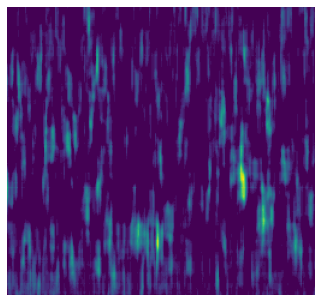

In [85]:
save_to_images(x_array=x_train, y_array=y_train,
               res_dir=IMAGES_RES_DIR, dif=2750)

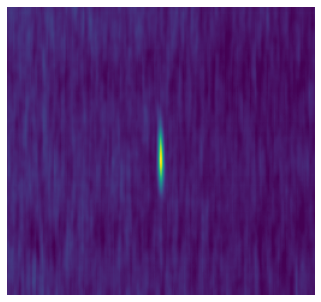

In [87]:
save_to_images(x_array=x_test, y_array=y_test,
               res_dir=IMAGES_RES_DIR_TEST, dif=50)

In [95]:
sort_by_folders(IMAGES_RES_DIR)
sort_by_folders(IMAGES_RES_DIR_TEST)